In [11]:
import random as r
import math as m

def generate_random_signal(max_omega, harmonics):
    amplitudes = [r.randint(0, 10) for _ in range(harmonics)]
    phases = [r.random() * 2 * np.pi for _ in range(harmonics)]

    def s(t):
        x = 0
        for k in range(harmonics):
            x += amplitudes[k] * m.sin(max_omega * (k + 1) / harmonics * t + phases[k])
        return x

    return np.vectorize(s)

In [12]:
import numpy as np


def dft(values):
    n = len(values)
    p = np.arange(n)
    k = p.reshape((n, 1))
    w = np.exp(-2j * np.pi * p * k / n)
    return np.dot(w, values)


def fft(values):
    signal = np.asarray(values, dtype=float)
    N = len(signal)

    if N <= 2:
        return dft(signal)
    else:
        signal_even = fft(signal[::2])
        signal_odd = fft(signal[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([signal_even + terms[:N // 2] * signal_odd,
                               signal_even + terms[N // 2:] * signal_odd])


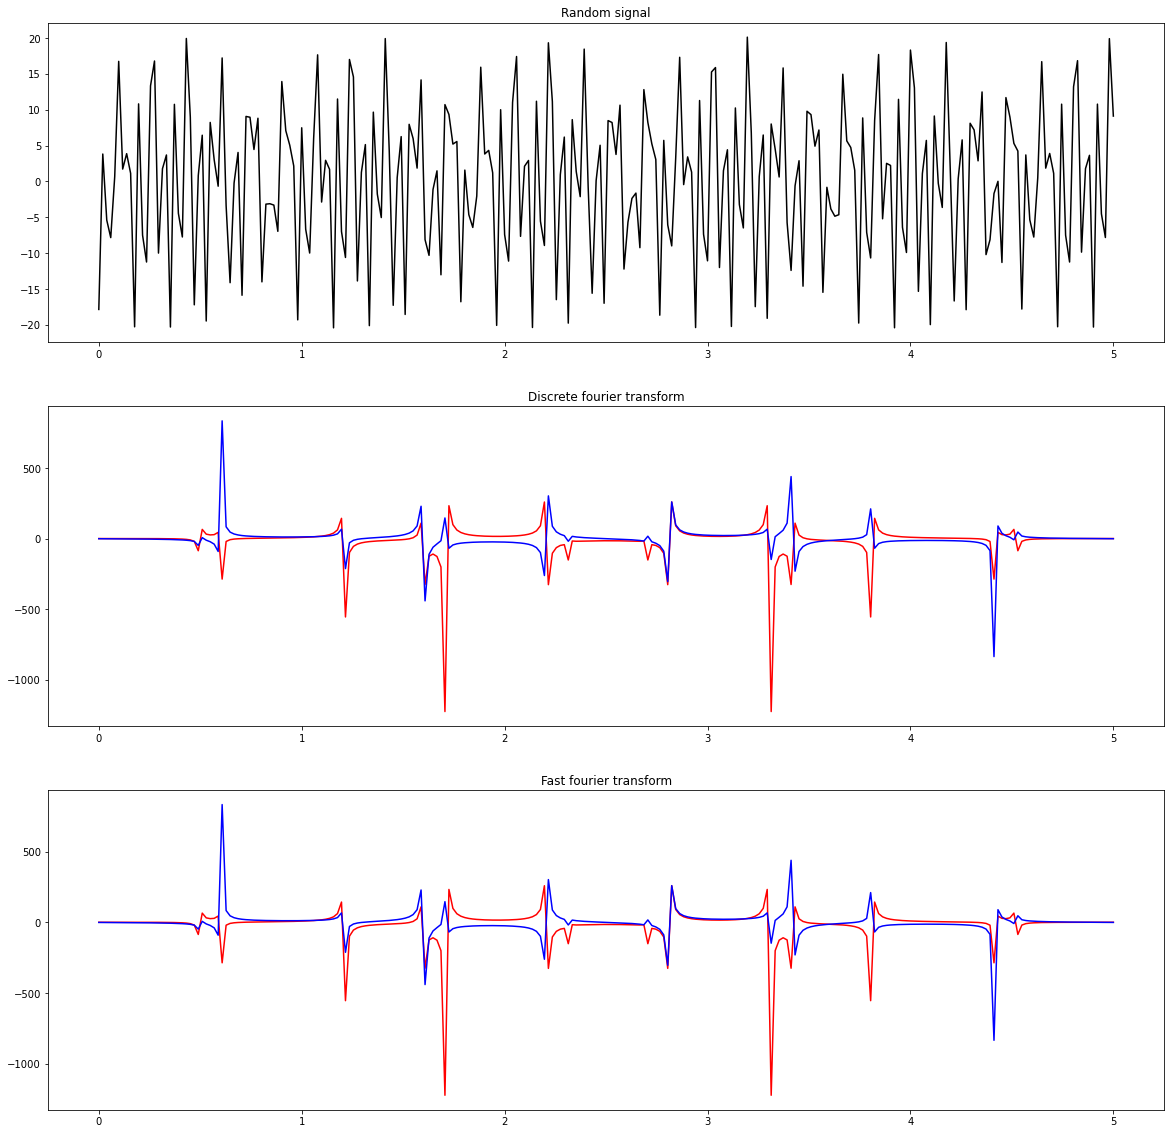

In [22]:
import matplotlib.pyplot as plt

signal = generate_random_signal(2000, 8)
t = np.linspace(0, 5, 256)
x = signal(t)
x_dft = dft(x)
x_fft = fft(x)

x_dft_re = x_dft.real
x_dft_im = x_dft.imag
x_fft_re = x_fft.real
x_fft_im = x_fft.imag

_, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20,20))

ax0.plot(t, x, 'k')
ax0.set_title("Random signal")

ax1.plot(t, x_dft_re, 'r', t, x_dft_im, 'b')
ax1.set_title("Discrete fourier transform")

ax2.plot(t, x_fft_re, 'r', t, x_fft_im, 'b')
ax2.set_title("Fast fourier transform")

plt.show()
